In [1]:
import os, sys
# module_path = os.path.abspath(os.path.join('../../Prompt-based-class-incremental-learning-in-Federated-Learning/CODA_Prompt_CVPR2023_Code/'))
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
import torch, torchvision, numpy as np
from dataloaders import dataloader
from dataloaders.dataloader import iCIFAR100_Fed
import random

/home/grbagwe/miniconda3/envs/promptFCL/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)

In [3]:
tasks = []
tasks_logits = []
p = 0
max_task = -1
other_split_size = 10 
first_split_size = 10 
num_classes = 100 
class_order = np.arange(num_classes).tolist()
class_order_logits = np.arange(num_classes).tolist()
rand_split = True

if seed > 0 and rand_split:
    print('=============================================')
    print('Shuffling....')
    print('pre-shuffle:' + str(class_order))
    random.seed(seed)
    random.shuffle(class_order)
    print('post-shuffle:' + str(class_order))
    print('=============================================')
            
            
while p < num_classes and (max_task == -1 or len(tasks) < max_task):
    inc = other_split_size if p > 0 else first_split_size
    tasks.append(class_order[p:p + inc])
    tasks_logits.append(class_order_logits[p:p + inc])
    p += inc
num_tasks = len(tasks)
task_names = [str(i + 1) for i in range(num_tasks)]


In [4]:
tasks

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]

In [5]:
import dataloaders
train_transform = dataloaders.utils.get_transform(dataset='CIFAR100_Fed', phase='train', aug=True,
                                                    resize_imnet=True)
test_transform = dataloaders.utils.get_transform(dataset='CIFAR100_Fed', phase='test', aug=True,
                                                    resize_imnet=True)

val_dataset = dataloader.iCIFAR100_Fed(root= "data", train = False,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=True, transform=test_transform,
                                         tasks=tasks, seed=0
                                        )
train_dataset = dataloader.iCIFAR100_Fed(root= "data", train = True,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=False, transform=train_transform,
                                         tasks=tasks, seed=0
                                        )

test_dataset = dataloader.iCIFAR100_Fed(root= "data", train = False,
                                         num_clients = 10,
                                         iid  = 0, 
                                        download_Flag = True,
                                        validation=False, transform=test_transform,
                                         tasks=tasks, seed=0
                                        )

Files already downloaded and verified
Validation is true
Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_dataset.data.shape, val_dataset.data.shape, test_dataset.data.shape

((45000, 32, 32, 3), (5000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
# train_dataset.load_dataset(t= 7, client=-1)
# len(train_dataset.targets)

In [8]:
test_dataset.load_dataset(t = 2,train = True)

targets in dataloader [20 21 22 23 24 25 26 27 28 29]


In [9]:
len(test_dataset.targets)

1000

In [10]:
# test loader for task 0
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)
# train_dataset.load_dataset(t = 0,train = True, client=1)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)


In [160]:
# load model 
from models.vit_coda_p import vit_pt_imnet
prompt_params = [10, [100, 8, 0 ,0 ,0]]
model_codap = vit_pt_imnet(out_dim=100, prompt_flag = 'codap', prompt_param=prompt_params)
st1 = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/niid_embedding_scaledtrilplet/models/repeat-1/task-10/class.pth")
st2 = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/niid_embedding_scaledtrilplet/models/repeat-1/task-3/class.pth")

st1_iid = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/iid/models/repeat-1/task-10/class.pth")
st2_iid = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/iid/models/repeat-1/task-3/class.pth")

++++++++++++++++++ in feature+++++++++++++++++++++
 freezing original model
freezing cls_token
freezing pos_embed
freezing patch_embed.proj.weight
freezing patch_embed.proj.bias
freezing blocks.0.norm1.weight
freezing blocks.0.norm1.bias
freezing blocks.0.attn.qkv.weight
freezing blocks.0.attn.qkv.bias
freezing blocks.0.attn.proj.weight
freezing blocks.0.attn.proj.bias
freezing blocks.0.norm2.weight
freezing blocks.0.norm2.bias
freezing blocks.0.mlp.fc1.weight
freezing blocks.0.mlp.fc1.bias
freezing blocks.0.mlp.fc2.weight
freezing blocks.0.mlp.fc2.bias
freezing blocks.1.norm1.weight
freezing blocks.1.norm1.bias
freezing blocks.1.attn.qkv.weight
freezing blocks.1.attn.qkv.bias
freezing blocks.1.attn.proj.weight
freezing blocks.1.attn.proj.bias
freezing blocks.1.norm2.weight
freezing blocks.1.norm2.bias
freezing blocks.1.mlp.fc1.weight
freezing blocks.1.mlp.fc1.bias
freezing blocks.1.mlp.fc2.weight
freezing blocks.1.mlp.fc2.bias
freezing blocks.2.norm1.weight
freezing blocks.2.norm1.bia

In [162]:
import copy
model1 = copy.deepcopy(model_codap)
model2 = copy.deepcopy(model_codap)
model1 = torch.nn.DataParallel(model1)
model2 = torch.nn.DataParallel(model2)
# model1.cuda(), model2.cuda()
model1.cuda()
model2.cuda()

model1.load_state_dict(st1)
model2.load_state_dict(st2)
model_1_iid = copy.deepcopy(model_codap)
model_2_iid = copy.deepcopy(model_codap)
model_1_iid = torch.nn.DataParallel(model_1_iid)
model_2_iid = torch.nn.DataParallel(model_2_iid)
# model1.cuda(), model2.cuda()
model_1_iid.cuda()
model_2_iid.cuda()
model_1_iid.load_state_dict(st1_iid)
model_2_iid.load_state_dict(st2_iid)


<All keys matched successfully>

In [163]:
for i, (images, labels) in enumerate(test_loader):
    images = images.cuda()
    labels = labels.cuda()
    with torch.no_grad():
        logits1_1, _, pre_logits_1, q_1 = model1(images, train = True)
        logits1_2, _, pre_logits_2,q_2 = model2(images, train = True)
        logits1_iid_1, _, pre_logits_iid_1, q_iid_1 = model_1_iid(images, train = True)
        logits1_iid_2, _, pre_logits_iid_2,q_iid_2 = model_2_iid(images, train = True)

        logits1 = logits1_1
        logits_og = logits1
        # logits2 = model2(images)
        # logits = (logits1 + logits2)/2
        # logits1 = logits1[:,:30]
        logits = logits1
        _, preds = torch.max(logits, 1)
        _, preds_2 = torch.max(logits1_2[:,0:30], 1)
        _, preds_iid_1 = torch.max(logits1_iid_1, 1)
        _, preds_iid_2 = torch.max(logits1_iid_2[:,0:30], 1)


        # add 20 to preds
        # preds = preds + 20
        acc = torch.sum(preds == labels).item() / labels.size(0)
        print(preds, labels)

        print("acc", acc)
        print( "preds_2", preds_2)
        print("preds_iid_1", preds_iid_1)
        print("preds_iid_2", preds_iid_2)
        

        break

tensor([23, 76, 21, 20, 94, 24, 22, 80, 85, 29, 22, 32, 21, 85, 80, 86, 76, 53,
        94, 21, 23, 24, 90, 94, 99, 22, 93, 28, 24, 24, 71, 80, 24, 23, 24, 21,
        40, 55, 28, 40, 29, 26, 80, 80, 80, 27, 94, 80, 91, 22, 22, 76, 26, 27,
        76, 40, 90, 27, 80, 57, 50, 76, 61, 45, 87, 24, 87, 22, 26, 78, 28, 21,
        76, 93, 93, 21, 21, 25, 90, 24, 22, 80, 55, 71, 76, 57, 84, 21, 24, 24,
        22, 84, 57, 26, 40, 21, 21, 76, 76, 71, 23, 57, 24, 84, 90, 80, 80, 21,
        81, 54, 76, 26, 66, 23, 88, 84, 28, 20, 71, 79, 64, 94, 57, 76, 21, 94,
        71, 70], device='cuda:0') tensor([23, 29, 21, 20, 25, 24, 22, 27, 22, 29, 22, 27, 21, 21, 26, 25, 20, 27,
        20, 21, 23, 24, 25, 20, 24, 22, 28, 28, 24, 24, 23, 27, 24, 23, 24, 21,
        28, 27, 28, 28, 29, 26, 21, 27, 29, 27, 27, 27, 26, 22, 22, 22, 26, 27,
        25, 25, 29, 27, 27, 26, 25, 20, 28, 26, 22, 24, 20, 22, 26, 22, 28, 21,
        25, 26, 29, 21, 21, 25, 25, 24, 22, 29, 23, 22, 25, 26, 20, 21, 24, 24,
      

In [164]:
torch.sum(pre_logits_1[0] - pre_logits_2[0])

tensor(5.0605e-05, device='cuda:0')

In [148]:
# model1.module.last.state_dict()

In [158]:
model1.module.last(pre_logits_1[0])

tensor([-10.6294, -11.8294, -10.5037,  -7.3202,  -9.3172, -10.3681,  -9.5813,
        -11.0830,  -7.6190, -10.4965,  -7.8101,  -9.3435,  -5.7949, -10.1437,
        -10.2441,  -9.2260, -10.2589,  -8.3527, -10.0273,  -8.8415,  -7.0708,
         -9.0371,  -7.2863,  -0.1060,  -8.6623,  -6.9183,  -7.7822,  -7.4883,
         -8.1351,  -5.6652,  -6.9498,  -6.0662,  -5.7977,  -5.0095,  -7.5059,
         -6.3690,  -6.9743,  -5.1180,  -7.6109,  -9.2761,  -5.7314,  -7.6933,
         -5.8939,  -7.1541,  -7.1225,  -7.6397,  -5.6529,  -5.8227,  -6.4950,
         -2.1985,  -5.6417,  -6.9338,  -4.4371,  -7.1126,  -6.1104,  -5.0639,
         -4.4474,  -5.4188,  -5.5585,  -3.0155,  -2.3967,  -6.2424,  -7.5332,
         -5.0690,  -5.1382,  -5.9561,  -5.7224,  -5.3951,  -4.6591,  -2.8164,
         -4.6695,  -0.3929,  -4.0758,  -4.1713,  -5.2894,  -4.1033,  -1.4858,
         -4.9136,  -4.6274,  -5.7346,  -3.8827,  -3.1228,  -5.3784,  -5.3027,
         -4.2971,  -4.0749,  -3.6755,  -2.5925,  -3.9997,  -3.60

In [159]:
model2.module.last(pre_logits_2[0])

tensor([-10.6294, -11.8295, -10.5037,  -7.3202,  -9.3172, -10.3681,  -9.5813,
        -11.0830,  -7.6190, -10.4966,  -7.8101,  -9.3435,  -5.7949, -10.1437,
        -10.2441,  -9.2261, -10.2590,  -8.3527, -10.0273,  -8.8415,  -7.0574,
         -9.0469,  -7.2878,  -0.1403,  -8.6337,  -6.9298,  -7.7318,  -7.4513,
         -8.1479,  -5.5823,  -0.7606,   2.4150,  -0.5042,  -0.2146,  -0.2253,
          0.7207,   1.2957,  -0.3528,  -0.6998,   0.2035,  -0.3755,  -0.6595,
          1.5844,   0.2050,  -0.3879,  -1.6829,  -0.6330,  -0.2186,   0.3370,
          0.9689,  -0.5870,  -2.8442,   0.1528,   0.6425,  -0.3888,  -0.7800,
         -0.2022,   1.4043,  -0.0192,   1.8707,   0.6996,   0.8951,  -0.9157,
          1.8459,   1.0750,  -0.3175,  -0.4730,   0.5669,  -1.5238,   0.0884,
          1.4296,  -0.7932,   0.4535,  -1.0342,  -1.0681,   1.2281,   1.5558,
          1.3616,   1.0175,   0.2455,   0.0122,  -1.0005,  -1.6178,   0.0300,
         -0.6465,  -0.6134,   0.2200,   0.8564,   1.2809,   0.44

In [149]:
# model2.module.last.state_dict()

In [150]:
# pre_logits_2[0]

In [152]:
torch.argmax(model1.module.last(pre_logits_2[0]))

tensor(23, device='cuda:0')

In [157]:
torch.argmax(model2.module.last(pre_logits_1[0])[:30])

tensor(23, device='cuda:0')

In [140]:
labels[0], torch.argmax(logits1_1[0]), torch.argmax(logits1_2[0])

(tensor(23, device='cuda:0'),
 tensor(23, device='cuda:0'),
 tensor(29, device='cuda:0'))

In [26]:
import torch.nn as nn
keys_st1 = st1['module.prompt.e_k_0']
p = st1['module.prompt.e_p_0']


q_norm = nn.functional.normalize(q_, dim=1)
n_K = nn.functional.normalize(keys_st1, dim=1)
aq_k = torch.einsum('bd,kd->bk', q_norm.cuda(), n_K.cuda())
P_ = torch.einsum('bk,kld->bld', aq_k.cuda(), p.cuda())

In [38]:
scores, indices = torch.topk(torch.sum(aq_k, dim=0), 10)


In [57]:
q_0 = q_[0].cuda()
keys_st1 = keys_st1.cuda()
sim_ind= []
for i in range(100):
    # torch.nn.CosineSimilarity(dim=0, eps=1e-6)(q_0, keys_st1[i])
    print(torch.nn.CosineSimilarity(dim=0, eps=1e-6)(q_0, keys_st1[i]))
    sim_ind.append(torch.nn.CosineSimilarity(dim=0, eps=1e-6)(q_0, keys_st1[i]))


tensor(0.0008, device='cuda:0')
tensor(0.0117, device='cuda:0')
tensor(-0.0635, device='cuda:0')
tensor(0.0255, device='cuda:0')
tensor(-0.0317, device='cuda:0')
tensor(-0.0361, device='cuda:0')
tensor(-0.0272, device='cuda:0')
tensor(-0.0453, device='cuda:0')
tensor(0.0472, device='cuda:0')
tensor(-0.0236, device='cuda:0')
tensor(0.0522, device='cuda:0')
tensor(0.0828, device='cuda:0')
tensor(0.0071, device='cuda:0')
tensor(-0.0496, device='cuda:0')
tensor(-0.0027, device='cuda:0')
tensor(-0.0465, device='cuda:0')
tensor(0.0026, device='cuda:0')
tensor(-0.0321, device='cuda:0')
tensor(0.0247, device='cuda:0')
tensor(0.0422, device='cuda:0')
tensor(-0.0445, device='cuda:0')
tensor(-0.0107, device='cuda:0')
tensor(0.0294, device='cuda:0')
tensor(-0.0008, device='cuda:0')
tensor(0.0010, device='cuda:0')
tensor(-0.0607, device='cuda:0')
tensor(-0.0114, device='cuda:0')
tensor(0.0368, device='cuda:0')
tensor(-0.0017, device='cuda:0')
tensor(-0.0336, device='cuda:0')
tensor(0.0821, device='

In [58]:
score , ind = torch.topk(torch.tensor(sim_ind), 10)

In [59]:
ind

tensor([11, 30, 87, 58, 61, 42, 10, 64, 62,  8])

In [60]:
labels[0]

tensor(23, device='cuda:0')

In [56]:
torch.nn.CosineSimilarity(dim=0, eps=1e-6)(q_0, keys_st1).shape

torch.Size([768])

In [218]:
# print all the preds not equal to labels
total_incorrect = 0
total_incorrect_g30 = 0
for i, pred in enumerate(preds):
    if pred != labels[i]:
        total_incorrect += 1
        if pred >30:
            print(pred.detach().cpu().numpy(), labels[i].detach().cpu().numpy())
            total_incorrect_g30 += 1

print("pred shape", preds.shape)
print("total_incorrect", total_incorrect)

print("total_incorrect_g30", total_incorrect_g30)


32 27
58 25
71 23
43 21
94 27
79 26
40 25
93 25
45 26
37 25
49 23
71 23
46 28
79 29
45 26
76 25
pred shape torch.Size([128])
total_incorrect 21
total_incorrect_g30 16


In [158]:
scores, indices = torch.topk(logits_og, 5, dim=1)


In [159]:
scores[0], indices[0]

(tensor([-2.5669, -2.9218, -3.7614, -3.8750, -3.9633], device='cuda:0'),
 tensor([57, 83, 70,  0, 90], device='cuda:0'))

In [88]:
for i, (images, labels) in enumerate(test_loader):
    images = images.cuda()
    labels = labels.cuda()
    with torch.no_grad():
        logits1 = model1(images)
        logits_og = logits1
        # logits2 = model2(images)
        # logits = (logits1 + logits2)/2
        # logits1 = logits1[:,:10]
        logits = logits1
        _, preds = torch.max(logits, 1)
        acc = torch.sum(preds == labels).item() / labels.size(0)
        print(preds,'\n', labels)
        print("acc", acc)
        break

tensor([ 0,  8,  8,  4,  6,  9,  2,  7,  6,  0,  9,  8,  1, 51, 80,  8,  9,  4,
         7,  6,  6,  2,  0,  0,  4,  6,  1,  6,  7,  8,  2,  6,  5,  9,  7, 24,
         0,  6,  3,  6,  3,  2,  8,  2,  5,  9,  7,  5, 35,  6,  0,  8,  4, 83,
         3,  2,  8,  6,  2,  8,  1,  2,  9, 92,  9,  3,  1,  4,  0,  0,  3,  8,
         7,  0,  5,  1, 33,  1,  1,  7,  1,  0,  1,  3,  4,  8,  7,  7,  0,  1,
         6,  6,  7,  6,  9,  1,  2,  8,  2,  9,  6,  3, 35,  9, 35,  0,  9,  1,
         0,  3,  8,  6,  9,  2,  3,  7,  7,  1, 48,  4,  1,  1,  9,  9,  0,  5,
         2,  2], device='cuda:0') 
 tensor([0, 8, 8, 4, 6, 9, 2, 7, 6, 0, 9, 8, 1, 4, 4, 8, 9, 4, 7, 6, 6, 2, 0, 0,
        4, 6, 1, 6, 7, 8, 2, 7, 5, 9, 7, 7, 0, 6, 3, 6, 3, 2, 8, 2, 5, 9, 7, 5,
        2, 6, 0, 8, 4, 0, 3, 2, 8, 6, 2, 8, 1, 2, 9, 7, 9, 3, 1, 4, 0, 0, 3, 8,
        7, 0, 5, 1, 6, 1, 1, 7, 1, 0, 1, 3, 4, 8, 7, 7, 0, 1, 6, 6, 7, 6, 9, 1,
        2, 8, 2, 9, 6, 3, 2, 9, 2, 0, 9, 1, 0, 3, 8, 6, 9, 2, 3, 7, 7, 1, 8, 4,
    

In [62]:
logits_og[0]

tensor([ -3.8750, -15.5412, -15.2822, -14.6839, -14.6898, -14.7954, -15.3071,
        -16.0326, -17.0629, -14.9766,  -6.8506,  -9.8459, -12.8333, -12.6693,
        -11.7477, -11.4122,  -9.4867, -13.6688, -13.6107, -11.1135,  -8.5984,
        -10.5350,  -8.8834,  -7.9410,  -7.1641,  -9.2967,  -8.1881, -12.4823,
         -6.8438, -10.4284,  -7.6836,  -7.3023,  -6.0095,  -5.9005,  -8.6389,
         -7.2114,  -7.1643,  -5.4243,  -6.9239,  -9.1478,  -5.9899,  -6.6885,
         -8.9336,  -9.7107,  -7.4439,  -7.7079,  -6.9071,  -8.7222,  -7.7159,
         -8.8416,  -7.1582,  -7.1707,  -8.3464,  -4.8234,  -6.0594,  -6.5754,
         -7.4814,  -2.5669,  -5.7630,  -8.7047,  -5.1122,  -5.3528,  -5.8680,
         -6.5100,  -7.5326,  -5.0108,  -5.9449,  -5.7377,  -5.9489,  -4.3038,
         -3.7614,  -6.1819,  -4.6122,  -5.9263,  -5.0056,  -5.9474,  -5.2399,
         -5.4882,  -4.7142,  -5.8078,  -5.9321,  -6.4610,  -6.2589,  -2.9218,
         -4.6292,  -6.3055,  -6.0599,  -4.9708,  -6.2679,  -7.39

In [92]:
logits_og[0]

tensor([11.6379, -2.6649, -2.3945, -2.5460, -3.1054, -2.1626, -2.7818, -2.9526,
        -4.5929, -0.3284,  3.6522, -0.4159, -4.4467, -3.8525, -2.4676, -3.1422,
        -0.7572, -5.1269, -3.8622, -2.1604, -0.8472, -2.8972, -0.9772, -1.3567,
         0.3898, -0.8054, -0.0911, -5.8205,  0.9100, -3.1022, -2.5422, -1.7781,
         0.8788, -0.0671, -2.4871,  0.8180, -1.7161,  0.9883, -1.4391, -0.2957,
         0.1015, -1.3130, -4.9796, -5.2192, -2.6978, -2.2231, -1.0323, -4.1772,
        -2.3297, -5.1329, -2.6539, -2.6125, -4.7632,  1.7965, -1.5855, -2.1597,
        -2.4876,  4.5060, -0.9806, -3.6072, -1.0290,  0.7408,  0.2772, -2.5698,
        -2.1800, -0.2572, -1.2421, -1.7071, -2.9088,  0.9170,  0.9564, -2.7573,
        -0.4826, -1.6642, -1.0925, -1.5364, -1.5310, -0.4942, -0.7283, -0.9050,
        -2.6256, -3.2443, -2.4405,  2.6113, -0.1712, -3.5070, -1.6284, -1.9093,
        -3.1675, -4.1349, -1.5294, -3.3422,  1.0541, -1.3605, -1.5730, -1.3621,
        -2.0605, -2.0921, -0.3642, -1.96

In [90]:
torch.max(logits_og[0][:10])

tensor(11.6379, device='cuda:0')

In [91]:
labels[0]

tensor(0, device='cuda:0')

In [123]:
def check_diff(st1, st2, key):
    for i in range(100):
     a= st1[key][i] - st2[key][i]
     print( i , torch.round(torch.sum(a), decimals=5))
    #  torch.round()


In [116]:
st1_c = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/niid_embedding_scaledtrilplet/models/repeat-1/task-1/class.pth")
st2_c = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/niid_embedding_scaledtrilplet/models/repeat-1/task-2/class.pth")

st1_iid_c = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/iid/models/repeat-1/task-1/class.pth")
st2_iid_c = torch.load("../_outputs/ICCV/CIFAR100/10-task/Fed-CPrompt/vit/iid/models/repeat-1/task-2/class.pth")

check_diff(st1_c, st2_c)


0 tensor(-0.0008)
1 tensor(0.0046)
2 tensor(0.0023)
3 tensor(-0.0019)
4 tensor(0.0007)
5 tensor(-0.0002)
6 tensor(0.0009)
7 tensor(0.0007)
8 tensor(-0.0010)
9 tensor(0.0064)
10 tensor(-0.3351)
11 tensor(-0.2483)
12 tensor(-0.4482)
13 tensor(-0.2832)
14 tensor(-0.3512)
15 tensor(-0.1289)
16 tensor(-0.3490)
17 tensor(-0.3591)
18 tensor(-0.1321)
19 tensor(-0.6878)
20 tensor(0.)
21 tensor(0.)
22 tensor(-0.)
23 tensor(-0.)
24 tensor(-0.)
25 tensor(-0.)
26 tensor(0.)
27 tensor(0.)
28 tensor(-0.)
29 tensor(-0.)
30 tensor(-0.)
31 tensor(-0.)
32 tensor(0.)
33 tensor(-0.)
34 tensor(0.)
35 tensor(0.)
36 tensor(0.)
37 tensor(0.)
38 tensor(-0.)
39 tensor(-0.)
40 tensor(0.)
41 tensor(0.)
42 tensor(0.)
43 tensor(0.)
44 tensor(0.)
45 tensor(-0.)
46 tensor(0.)
47 tensor(0.)
48 tensor(-0.)
49 tensor(-0.)
50 tensor(-0.)
51 tensor(0.)
52 tensor(-0.)
53 tensor(0.)
54 tensor(0.)
55 tensor(-0.)
56 tensor(-0.)
57 tensor(-0.)
58 tensor(-0.)
59 tensor(-0.)
60 tensor(-0.)
61 tensor(0.)
62 tensor(0.)
63 tensor(0.

In [117]:
check_diff(st1_iid_c, st2_iid_c)

0 tensor(1.0000e-05)
1 tensor(0.)
2 tensor(-0.)
3 tensor(-0.)
4 tensor(-0.)
5 tensor(0.)
6 tensor(-0.)
7 tensor(0.)
8 tensor(-1.0000e-05)
9 tensor(-0.)
10 tensor(-0.0569)
11 tensor(0.0604)
12 tensor(-0.0526)
13 tensor(-0.1601)
14 tensor(-0.0193)
15 tensor(-0.1450)
16 tensor(-0.1885)
17 tensor(-0.1812)
18 tensor(0.4209)
19 tensor(-0.5322)
20 tensor(0.)
21 tensor(-0.)
22 tensor(0.)
23 tensor(-0.)
24 tensor(-0.)
25 tensor(-0.)
26 tensor(-0.)
27 tensor(-0.)
28 tensor(0.)
29 tensor(-0.)
30 tensor(0.)
31 tensor(0.)
32 tensor(0.)
33 tensor(0.)
34 tensor(0.)
35 tensor(0.)
36 tensor(-0.)
37 tensor(0.)
38 tensor(0.)
39 tensor(0.)
40 tensor(-0.)
41 tensor(-0.)
42 tensor(-0.)
43 tensor(-0.)
44 tensor(-0.)
45 tensor(-0.)
46 tensor(0.)
47 tensor(-0.)
48 tensor(0.)
49 tensor(0.)
50 tensor(0.)
51 tensor(-0.)
52 tensor(-0.)
53 tensor(0.)
54 tensor(0.)
55 tensor(0.)
56 tensor(-0.)
57 tensor(-0.)
58 tensor(-0.)
59 tensor(0.)
60 tensor(-0.)
61 tensor(-0.)
62 tensor(0.)
63 tensor(-0.)
64 tensor(0.)
65 tens

In [119]:
keys_st1_c = st1_c['module.prompt.e_k_0']
keys_st2_c = st2_c['module.prompt.e_k_0']
keys_st1_iid_c = st1_iid_c['module.prompt.e_k_0']
keys_st2_iid_c = st2_iid_c['module.prompt.e_k_0']


In [126]:
check_diff(st1_iid_c, st2_iid_c, "module.prompt.e_k_0")

0 tensor(0.)
1 tensor(0.)
2 tensor(0.)
3 tensor(0.)
4 tensor(0.)
5 tensor(-0.)
6 tensor(-0.)
7 tensor(0.)
8 tensor(-0.)
9 tensor(0.)
10 tensor(0.4761)
11 tensor(0.1716)
12 tensor(-0.3754)
13 tensor(-0.2869)
14 tensor(-0.3810)
15 tensor(0.4018)
16 tensor(0.4773)
17 tensor(-0.5453)
18 tensor(0.3002)
19 tensor(0.5324)
20 tensor(0.)
21 tensor(-0.)
22 tensor(-0.)
23 tensor(0.)
24 tensor(-0.)
25 tensor(-0.)
26 tensor(-0.)
27 tensor(-0.)
28 tensor(0.)
29 tensor(-0.)
30 tensor(0.)
31 tensor(-0.)
32 tensor(-0.)
33 tensor(-0.)
34 tensor(0.)
35 tensor(0.)
36 tensor(0.)
37 tensor(0.)
38 tensor(0.)
39 tensor(-0.)
40 tensor(-0.)
41 tensor(0.)
42 tensor(0.)
43 tensor(0.)
44 tensor(-0.)
45 tensor(-0.)
46 tensor(0.)
47 tensor(0.)
48 tensor(-0.)
49 tensor(-0.)
50 tensor(0.)
51 tensor(-0.)
52 tensor(0.)
53 tensor(-0.)
54 tensor(0.)
55 tensor(0.)
56 tensor(0.)
57 tensor(0.)
58 tensor(0.)
59 tensor(-0.)
60 tensor(-0.)
61 tensor(-0.)
62 tensor(0.)
63 tensor(0.)
64 tensor(-0.)
65 tensor(0.)
66 tensor(-0.)
67

In [124]:
check_diff(st1_c, st2_c, "module.prompt.e_k_0")

0 tensor(-0.0003)
1 tensor(0.0001)
2 tensor(-0.0001)
3 tensor(-0.0004)
4 tensor(-0.0004)
5 tensor(0.0002)
6 tensor(-0.0006)
7 tensor(-0.0005)
8 tensor(-0.0003)
9 tensor(-0.0002)
10 tensor(-0.0038)
11 tensor(-0.0144)
12 tensor(-0.0157)
13 tensor(0.0087)
14 tensor(-0.0056)
15 tensor(0.0053)
16 tensor(-0.0305)
17 tensor(0.0215)
18 tensor(0.0056)
19 tensor(-0.0002)
20 tensor(0.)
21 tensor(0.)
22 tensor(-0.)
23 tensor(0.)
24 tensor(0.)
25 tensor(0.)
26 tensor(0.)
27 tensor(0.)
28 tensor(-0.)
29 tensor(-0.)
30 tensor(0.)
31 tensor(0.)
32 tensor(-0.)
33 tensor(-0.)
34 tensor(-0.)
35 tensor(0.)
36 tensor(0.)
37 tensor(0.)
38 tensor(-0.)
39 tensor(-0.)
40 tensor(-0.)
41 tensor(0.)
42 tensor(-0.)
43 tensor(0.)
44 tensor(-0.)
45 tensor(-0.)
46 tensor(0.)
47 tensor(-0.)
48 tensor(-0.)
49 tensor(0.)
50 tensor(-0.)
51 tensor(-0.)
52 tensor(0.)
53 tensor(0.)
54 tensor(0.)
55 tensor(-0.)
56 tensor(0.)
57 tensor(-0.)
58 tensor(0.)
59 tensor(0.)
60 tensor(-0.)
61 tensor(0.)
62 tensor(-0.)
63 tensor(-0.)

In [132]:
# code to check similarity between between keys
keys_st1_c = st1_c['module.prompt.e_k_0'][:10]
keys_st2_c = st2_c['module.prompt.e_k_0'][10:20]
keys_st1_iid_c = st1_iid_c['module.prompt.e_k_0']
keys_st2_iid_c = st2_iid_c['module.prompt.e_k_0']

# check cosine similarity between keys
from torch.nn.functional import cosine_similarity
# cosine_similarity(keys_st1_c, keys_st2_c)
print(cosine_similarity(keys_st1_c, keys_st2_c))
# print(cosine_similarity(keys_st1_iid_c, keys_st2_iid_c))


tensor([-0.0025,  0.0003, -0.0010,  0.0001, -0.0009, -0.0013, -0.0010,  0.0012,
        -0.0008,  0.0003])


In [137]:
keys_st1_c, keys_st2_c

(tensor([[ 0.0009,  0.0445,  0.0502,  ..., -0.0074, -0.0005,  0.0508],
         [-0.0407,  0.0095, -0.0284,  ...,  0.0583, -0.0792,  0.0621],
         [-0.0107,  0.0244, -0.0327,  ..., -0.0162,  0.0312, -0.0007],
         ...,
         [-0.0008,  0.0014,  0.0159,  ..., -0.0132,  0.0329, -0.0555],
         [ 0.0157,  0.0161, -0.0061,  ...,  0.0092, -0.0731,  0.0240],
         [-0.0669, -0.0343, -0.0302,  ..., -0.0423, -0.1012, -0.0372]]),
 tensor([[ 0.0118,  0.0132,  0.0293,  ..., -0.0307, -0.0276,  0.0257],
         [ 0.0316, -0.0251, -0.0386,  ...,  0.0276, -0.0087,  0.0170],
         [ 0.0427,  0.0119, -0.0183,  ..., -0.0490, -0.0165,  0.0011],
         ...,
         [-0.0075, -0.0088, -0.0585,  ...,  0.0367, -0.0819, -0.0266],
         [-0.0465, -0.0502, -0.0020,  ..., -0.0564,  0.0337, -0.0129],
         [ 0.0079,  0.0078,  0.0130,  ...,  0.0435, -0.0214,  0.0448]]))

In [130]:
print(cosine_similarity(keys_st1_iid_c, keys_st2_iid_c))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 0.9632, 0.9809, 0.9350, 0.9539, 0.9575, 0.9396, 0.9395, 0.9286,
        0.9772, 0.9320, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [131]:
# intermediate model output from the first layer
output = model1.module.prompt.e_k_0(images)
output.shape

TypeError: 'Parameter' object is not callable

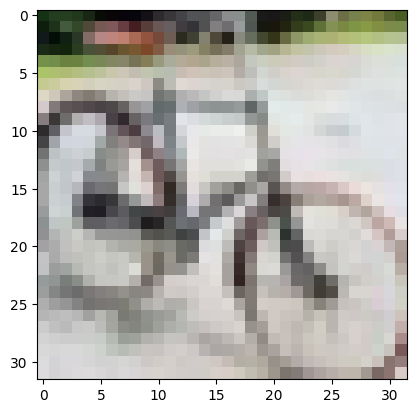

In [20]:
import matplotlib.pyplot as plt

plt.imshow(test_dataset.data[1])

In [19]:
train_dataset.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [112]:
for key in st1.keys():
    print(key)

module.last.weight
module.last.bias
module.prompt.e_p_0
module.prompt.e_k_0
module.prompt.e_a_0
module.prompt.e_p_1
module.prompt.e_k_1
module.prompt.e_a_1
module.prompt.e_p_2
module.prompt.e_k_2
module.prompt.e_a_2
module.prompt.e_p_3
module.prompt.e_k_3
module.prompt.e_a_3
module.prompt.e_p_4
module.prompt.e_k_4
module.prompt.e_a_4
module.feat.cls_token
module.feat.pos_embed
module.feat.patch_embed.proj.weight
module.feat.patch_embed.proj.bias
module.feat.blocks.0.norm1.weight
module.feat.blocks.0.norm1.bias
module.feat.blocks.0.attn.qkv.weight
module.feat.blocks.0.attn.qkv.bias
module.feat.blocks.0.attn.proj.weight
module.feat.blocks.0.attn.proj.bias
module.feat.blocks.0.norm2.weight
module.feat.blocks.0.norm2.bias
module.feat.blocks.0.mlp.fc1.weight
module.feat.blocks.0.mlp.fc1.bias
module.feat.blocks.0.mlp.fc2.weight
module.feat.blocks.0.mlp.fc2.bias
module.feat.blocks.1.norm1.weight
module.feat.blocks.1.norm1.bias
module.feat.blocks.1.attn.qkv.weight
module.feat.blocks.1.attn.qkv